# Autocodificadores 

---


Neste notebook criaremos um autoencoder profundo, passo-a-passo, usando o conjunto de dados de dígitos manuscritos MNIST.

Criaremos um auto-codificador profundo em que a imagem de entrada tem uma dimensão de 784 (28x28). 

Em seguida, codificamos para uma dimensão de 128 e depois para 64 e depois para 32. 

Começaremos a decodificar a imagem de 32 dimensões para 64 e depois para 128 e, finalmente, reconstruir de volta à dimensão original de 784.

*Importando as Bibliotecas Necessárias:*


In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


*Carregando as imagens do conjunto de dados MNIST:*

Nós não carregamos os rótulos. Queremos reconstruir as imagens como saída do autoencoder.

Criando um conjunto de treinamento e conjunto de testes e normalizando os dados para treinar melhor o modelo.

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
print("before")
print(X_train.shape)
print(X_test.shape)
print(X_train.min(), X_train.max())
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print(X_train.shape[1:])
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print("after")
print(X_train.shape)
print(X_test.shape)
print(X_train.min(), X_train.max())

11493376/11490434 [==============================] - 1s 0us/step
before
(60000, 28, 28)
(10000, 28, 28)
0 255
(28, 28)
after
(60000, 784)
(10000, 784)
0.0 1.0


Precisamos agora criar um objeto para representar entrada da rede neural nas  funções da biblioteca Keras (que implementa modelos de redes neurais). Esse tipo de objeto retornado pela função Input se chama tensor. 

In [ ]:
input_img= Input(shape=(784,))
input_img

<tf.Tensor 'input_1:0' shape=(None, 784) dtype=float32>

Para construir o autoencoder, teremos que codificar primeiro a imagem de entrada e adicionar diferentes camadas codificadas e decodificadas para criar o autoencoder profundo, como mostrado na imagem abaixo e no código a seguir. 
![alt text](https://miro.medium.com/max/724/1*EQU7F2dZ6p7_qiA_OS6qQg.png)

In [ ]:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

Na camada final em que reconstruímos a imagem de entrada, usamos a função de ativação sigmóide. A camada de saída precisa prever a probabilidade de uma saída que seja 0 ou 1 e, portanto, usamos a função de ativação sigmóide.

Para todas as camadas ocultas do codificador e decodificador, usamos a função de ativação relu (computacionalmente mais eficiente e previne o problema do desaparecimento dos gradientes).

![alt text](https://miro.medium.com/max/726/1*XxxiA0jJvPrHEJHD4z893g.png)

Criamos o autoencoder com o objeto que representa imagem de entrada como sendo a entrada da rede. A saída será a camada final do decodificador.



In [ ]:
autoencoder=Model(input_img, decoded)

Podemos extrair o codificador que obtém a imagem de entrada e produz sua codificação na dimensão 32.

In [ ]:
encoder = Model(input_img, encoded)

Vejamos como ficou a estrutura de nosso autocodificador:

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               1011

Vejamos agora a estrutura do codificador:

In [ ]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


Agora, é necessário compilar o modelo que criamos. 
Precisamos definir qual a função de perda (custo ou erro) deverá ser otimizada e qual o algoritmo de otimização. 

Como os pixels têm um valor entre 0 e 1, usamos binary_crossentropy como a função de perda. Ela é melhor que o erro médio quadrático nesta situação. 

Como função de otimização, utilizaremos Adam, um método de treinamento dos pesos que converge mais rapidamente para um erro mínimo, quando comparado a método tradicional de gradiente descendente.

Usamos a acurácia como métrica para avaliar o desempenho do modelo.


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Finalmente treinamos o autoencoder usando os dados de treinamento com 50 épocas de treinamento e tamanho de lote de treinamento (batch) de 256. Isto quer dizer que os dados de treinamento são divididos em lotes, de modo a poderem ser acomodados todos na memória. O treinamento ocorre otimizando a função de perda por partes, um lote de treinamento por vez. 

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.2396 - accuracy: 0.7855 - val_loss: 0.1617 - val_accuracy: 0.8015
Epoch 2/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1484 - accuracy: 0.8054 - val_loss: 0.1358 - val_accuracy: 0.8074
Epoch 3/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1319 - accuracy: 0.8084 - val_loss: 0.1256 - val_accuracy: 0.8086
Epoch 4/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1240 - accuracy: 0.8098 - val_loss: 0.1192 - val_accuracy: 0.8094
Epoch 5/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1181 - accuracy: 0.8107 - val_loss: 0.1138 - val_accuracy: 0.8101
Epoch 6/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1132 - accuracy: 0.8114 - val_loss: 0.1096 - val_accuracy: 0.8108
Epoch 7/50
60000/60000 [==============================] - 4s 65us/st

A seguir, vamos propagar o conjunto de testes pelo autoencoder completo para obter a imagem reconstruída.
Também vamos propagar o conjunto de testes usando apenas a parte da rede responsável pela codificação,  para visualizarmos as imagens codificadas na dimensão 32.

In [ ]:
predicted = autoencoder.predict(X_test)
encoded_imgs = encoder.predict(X_test)

Para visualizar a entrada original, imagens codificadas e imagens reconstruídas,vamos usar funções da biblioteca matplotlib.


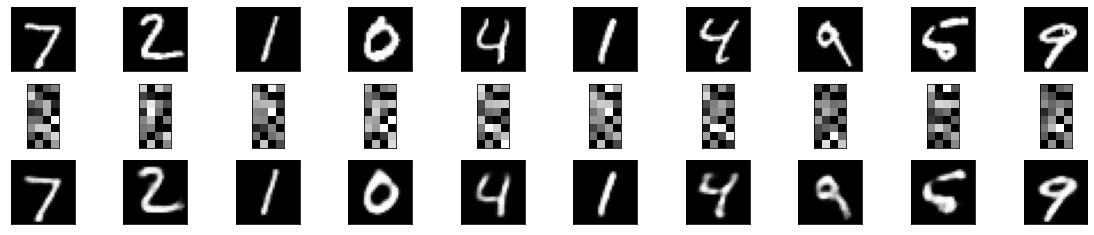

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()


**Agora é a sua vez**

1) Verifique se o código no espaço interno de dimensão 32 é estável para dígitos de uma mesma classe e se ele muda para dígitos de classes diferentes (escreva um código para isso).

2) Utilizando os códigos anteriores, crie um autocoficador mais raso, com apenas 1 camada escondida (784-128-784) e treine este autocodificador pelo mesmo número de épocas de treinamento anterior (50). Agora, compare os valores da perda e da acurácia de validação (val_loss e val_acc), obtidos ao final do treinamento, com os respectivos valores resultantes do treinamento do modelo autocodificador original mais profundo. Alguma mudança perceptível nos valores? As imagens reconstruídas possuem a mesma qualidade? Procure explicar as eventuais diferenças. 

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 784)               101136    
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.2831 - accuracy: 0.7995 - val_loss: 0.2069 - val_accuracy: 0.8062
Epoch 2/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1985 - accuracy: 0.8086 - val_loss: 0.2211 - val_accuracy: 0.8038
Epoch 3/50
60000/60000 [===============

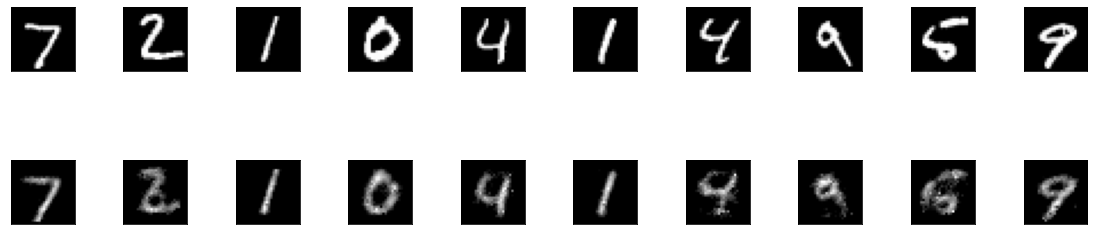

In [ ]:
encoded2 = Dense(units=128, activation='relu')(input_img)
decoded2 = Dense(units=784, activation='relu')(encoded2)

autoencoder2=Model(input_img, decoded2)
autoencoder2.summary()

autoencoder2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder2.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))
predicted2 = autoencoder2.predict(X_test)



plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax.get_yaxis().set_visible(False)# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()


2) Não houve uma grande perda de acurácia, mas os valores de perda aumentaram muito. É possível perceber que as imagens comparadas ao modelo original contém muito mais ruído e perca de forma, principalmente cor e brilho.

# Rede convolucional para classificação de dígitos manuscritos

Importando funções necessárias das bibliotecas

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report

Parâmetros de *treinamento*

In [ ]:
batch_size = 128
num_classes = 10
epochs = 5

Lendo e normalizando os dados de treinamento e de teste

In [ ]:
# dimensões da imagem de entrada
img_rows, img_cols = 28, 28

# carregamento dos dados de treinamento e de teste
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# use apenas uma fração dos dados de treinamento/teste
x_train=x_train[1:7501]
y_train=y_train[1:7501]
x_test=x_test[1:1251]
y_test=y_test[1:1251]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_train.shape)
print(x_train.shape[0], 'exemplos de treino')
print(x_test.shape[0], 'exemplos de teste')

# converte as saídas para matrizes binárias (one hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])
print(y_train[1])

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

Definindo e compilando a rede neural convolucional

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Treinamento da rede convolucional

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Perda do teste:', score[0])
print('Acurácia do teste:', score[1])

Train on 7500 samples, validate on 1250 samples
Epoch 1/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.7884 - accuracy: 0.7484 - val_loss: 0.2794 - val_accuracy: 0.9248
Epoch 2/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1827 - accuracy: 0.9468 - val_loss: 0.1938 - val_accuracy: 0.9312
Epoch 3/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1214 - accuracy: 0.9676 - val_loss: 0.1351 - val_accuracy: 0.9552
Epoch 4/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0791 - accuracy: 0.9773 - val_loss: 0.1413 - val_accuracy: 0.9512
Epoch 5/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0623 - accuracy: 0.9839 - val_loss: 0.0950 - val_accuracy: 0.9664
Perda do teste: 0.09504395071044565
Acurácia do teste: 0.9664000272750854


Avaliação de performance utilizando matriz de confusão e outras estatísticas de acerto (precisão, revocação, f1 etc)

In [ ]:
#obtem as saídas reais do modelo treinado, recebendo o cj. de teste como entrada
y_pred = model.predict(x_test)

#converte para números inteiros as saídas desejadas e saídas da predição
y_pred_int = y_pred.argmax(axis=1)
y_test_int = y_test.argmax(axis=1)
print(y_pred_int[0])
print(y_test_int[0])

#apresenta a matriz de confusão
print(confusion_matrix(y_test_int, y_pred_int))
print()

#apresenta o relatório de classificação
print(classification_report(y_test_int, y_pred_int))

2
2
[[106   0   0   0   0   0   0   0   0   0]
 [  0 153   1   0   0   0   0   0   1   0]
 [  0   1 133   0   2   0   0   1   3   0]
 [  1   0   0 124   0   2   0   2   2   0]
 [  0   0   0   0 135   0   0   0   0   4]
 [  0   0   0   0   0 109   0   0   2   0]
 [  3   1   0   0   1   1 100   0   2   0]
 [  0   0   2   0   0   0   0 123   0   3]
 [  0   0   0   1   1   0   0   1 111   1]
 [  1   0   0   0   1   0   0   1   0 114]]

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       106
           1       0.99      0.99      0.99       155
           2       0.98      0.95      0.96       140
           3       0.99      0.95      0.97       131
           4       0.96      0.97      0.97       139
           5       0.97      0.98      0.98       111
           6       1.00      0.93      0.96       108
           7       0.96      0.96      0.96       128
           8       0.92      0.97      0.94       115
           9       0.93

##Agora é a sua vez
Aproveitando o código anterior, escreva um programa que imprima as matrizes de confusão de 3 versões modificadas (gradualmente mais simples) da rede neural original. Cada versão deverá ter 1/2, 1/4 e 1/8 de filtros convolucionais e de neurônios na camada densa. Como ficaram os resultados? Melhoraram? Pioraram? Procure fornecer uma explicação.

##Bonus
Reduza as dimensões da imagem de entrada para 14x14 e repita o teste anterior. As conclusões serão as mesmas? Comente.

In [ ]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(16,kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Perda do teste:', score[0])
print('Acurácia do teste:', score[1])

#obtem as saídas reais do modelo treinado, recebendo o cj. de teste como entrada
y_pred = model.predict(x_test)

#converte para números inteiros as saídas desejadas e saídas da predição
y_pred_int = y_pred.argmax(axis=1)
y_test_int = y_test.argmax(axis=1)
print(y_pred_int[0])
print(y_test_int[0])

#apresenta a matriz de confusão
print(confusion_matrix(y_test_int, y_pred_int))
print()

#apresenta o relatório de classificação
print(classification_report(y_test_int, y_pred_int))

Train on 7500 samples, validate on 1250 samples
Epoch 1/5
7500/7500 [==============================] - 6s 790us/step - loss: 0.9398 - accuracy: 0.7156 - val_loss: 0.4950 - val_accuracy: 0.8416
Epoch 2/5
7500/7500 [==============================] - 6s 771us/step - loss: 0.2270 - accuracy: 0.9375 - val_loss: 0.2469 - val_accuracy: 0.9296
Epoch 3/5
7500/7500 [==============================] - 6s 764us/step - loss: 0.1458 - accuracy: 0.9588 - val_loss: 0.2068 - val_accuracy: 0.9360
Epoch 4/5
7500/7500 [==============================] - 6s 770us/step - loss: 0.1046 - accuracy: 0.9688 - val_loss: 0.1312 - val_accuracy: 0.9576
Epoch 5/5
7500/7500 [==============================] - 6s 770us/step - loss: 0.0816 - accuracy: 0.9768 - val_loss: 0.1171 - val_accuracy: 0.9664
Perda do teste: 0.11714478229880333
Acurácia do teste: 0.9664000272750854
2
2
[[105   0   0   0   0   0   1   0   0   0]
 [  0 155   0   0   0   0   0   0   0   0]
 [  0   1 136   1   0   0   0   2   0   0]
 [  0   0   0 126   

In [ ]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(8,kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Perda do teste:', score[0])
print('Acurácia do teste:', score[1])

#obtem as saídas reais do modelo treinado, recebendo o cj. de teste como entrada
y_pred = model.predict(x_test)

#converte para números inteiros as saídas desejadas e saídas da predição
y_pred_int = y_pred.argmax(axis=1)
y_test_int = y_test.argmax(axis=1)
print(y_pred_int[0])
print(y_test_int[0])

#apresenta a matriz de confusão
print(confusion_matrix(y_test_int, y_pred_int))
print()

#apresenta o relatório de classificação
print(classification_report(y_test_int, y_pred_int))

Train on 7500 samples, validate on 1250 samples
Epoch 1/5
7500/7500 [==============================] - 5s 600us/step - loss: 1.1772 - accuracy: 0.6291 - val_loss: 0.8333 - val_accuracy: 0.7432
Epoch 2/5
7500/7500 [==============================] - 4s 585us/step - loss: 0.3193 - accuracy: 0.9100 - val_loss: 0.2908 - val_accuracy: 0.9160
Epoch 3/5
7500/7500 [==============================] - 4s 582us/step - loss: 0.2027 - accuracy: 0.9435 - val_loss: 0.2072 - val_accuracy: 0.9360
Epoch 4/5
7500/7500 [==============================] - 4s 583us/step - loss: 0.1542 - accuracy: 0.9556 - val_loss: 0.1722 - val_accuracy: 0.9520
Epoch 5/5
7500/7500 [==============================] - 4s 578us/step - loss: 0.1266 - accuracy: 0.9637 - val_loss: 0.1526 - val_accuracy: 0.9504
Perda do teste: 0.15264023343250155
Acurácia do teste: 0.9503999948501587
2
2
[[104   0   0   0   0   2   0   0   0   0]
 [  0 155   0   0   0   0   0   0   0   0]
 [  0   1 131   1   0   0   0   4   3   0]
 [  0   0   0 126   

In [ ]:
model = Sequential()
model.add(Conv2D(2, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(4,kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Perda do teste:', score[0])
print('Acurácia do teste:', score[1])

#obtem as saídas reais do modelo treinado, recebendo o cj. de teste como entrada
y_pred = model.predict(x_test)

#converte para números inteiros as saídas desejadas e saídas da predição
y_pred_int = y_pred.argmax(axis=1)
y_test_int = y_test.argmax(axis=1)
print(y_pred_int[0])
print(y_test_int[0])

#apresenta a matriz de confusão
print(confusion_matrix(y_test_int, y_pred_int))
print()

#apresenta o relatório de classificação
print(classification_report(y_test_int, y_pred_int))

Train on 7500 samples, validate on 1250 samples
Epoch 1/5
7500/7500 [==============================] - 4s 507us/step - loss: 1.6360 - accuracy: 0.4728 - val_loss: 1.1040 - val_accuracy: 0.6720
Epoch 2/5
7500/7500 [==============================] - 4s 496us/step - loss: 0.5496 - accuracy: 0.8373 - val_loss: 0.5814 - val_accuracy: 0.8200
Epoch 3/5
7500/7500 [==============================] - 4s 479us/step - loss: 0.3368 - accuracy: 0.8993 - val_loss: 0.4325 - val_accuracy: 0.8688
Epoch 4/5
7500/7500 [==============================] - 4s 486us/step - loss: 0.2614 - accuracy: 0.9275 - val_loss: 0.2897 - val_accuracy: 0.9200
Epoch 5/5
7500/7500 [==============================] - 4s 483us/step - loss: 0.2168 - accuracy: 0.9400 - val_loss: 0.2682 - val_accuracy: 0.9240
Perda do teste: 0.2682466314911842
Acurácia do teste: 0.9240000247955322
2
2
[[104   0   0   0   1   0   1   0   0   0]
 [  0 155   0   0   0   0   0   0   0   0]
 [  0   0 122   2   0   0   2   5   6   3]
 [  0   0   0 120   0

Resposta: Houve uma 'perda de teste' maior a cada diminuição do número de filtros convolucionais e de neurônios na camada densa. Como também a perda da acurácia gradualmente. Ou seja o classificador confudiu cada vez mais, como é possível notar com as matrizes de confusão. O que pode explicar isso é que com a diminução da quantidade de filtros, é possível que algumas características podem não ter sido detectadas, ou o número de neurônios baixo pode gerar uma representação não muito boa.